In [1]:
# pendul - Program to compute the motion of a simple pendulum
# using the Euler or Verlet method

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#* Select the numerical method to use: Euler or Verlet
NumericalMethod = eval(input('Choose a numerical method (1: Euler; 2: Verlet): '))

#* Set initial position and velocity of pendulum
theta0 = float(input('Enter initial angle (in degrees): '))
theta = theta0 * np.pi /180     # Convert angle to radians
omega = 0.0                     # Set the initial velocity

#* Set the physical constants and other variables
g_over_L = 1.0            # The constant g/L
time = 0.0                # Initial time
irev = 0                  # Used to count number of reversals
tau = float(input('Enter time step: '))

#* Take one backward step to start Verlet
accel = -g_over_L * np.sin(theta)    # Gravitational acceleration
theta_old = theta - omega*tau + 0.5*accel*tau**2  

Choose a numerical method (1: Euler; 2: Verlet): 2
Enter initial angle (in degrees): 150
Enter time step: 0.1


In [3]:
#* Loop over desired number of steps with given time step
#    and numerical method
nstep = int(input('Enter number of time steps: '))
t_plot = np.zeros(nstep)
th_plot = np.zeros(nstep)
omegaplt = np.zeros(nstep)
period = np.zeros(nstep)   # Used to record period estimates

for istep in range(nstep):  

    #* Record angle and time for plotting
    t_plot[istep] = time            
    th_plot[istep] = theta * 180 / np.pi  # Convert angle to degrees
    omegaplt[istep] = omega
    
    time = time + tau
   
    #* Compute new position and velocity using 
    #    Euler or Verlet method
    accel = -g_over_L * np.sin(theta)   # Gravitational acceleration
    if NumericalMethod == 1 :
        theta_old = theta               # Save previous angle
        theta = theta + tau*omega       # Euler method
        omega = omega + tau*accel 
    
    else:  
        theta_new = 2*theta - theta_old + tau**2 * accel
        omega = (theta_new - theta)/tau #Saves values for omega = d(theta)/dt, no effect on Verlet Method
        
        theta_old = theta               # Verlet method
        theta = theta_new  
        
  
    #* Test if the pendulum has passed through theta = 0;
     #if yes, use time to estimate period

    if theta*theta_old < 0 :  # Test position for sign change
        print('Turning point at time t = ',time)
        if irev == 0 :          # If this is the first change,
            time_old = time     # just record the time
        else:
            period[irev-1] = 2*(time - time_old)
            time_old = time
        irev = irev + 1     # Increment the number of reversals
    
    P = 2*np.pi*np.sqrt(1/g_over_L)*(1+(1/16)*max(th_plot*np.pi/180)**2) #Approximation of period including small angle
    if irev >= 2:
        if max(t_plot) > period[0]:
            break
        



Enter number of time steps: 400
Turning point at time t =  2.800000000000001
Turning point at time t =  8.399999999999986


Average period =  11.19999999999997  +/-  0.0 seconds


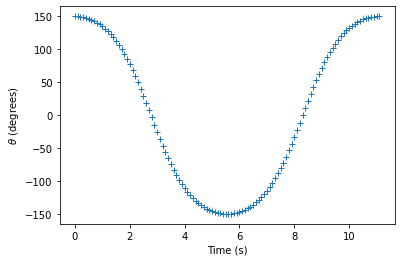

In [4]:
# Estimate period of oscillation, including error bar
nPeriod = irev-1    # Number of times the period was measured
AvePeriod = np.mean( period[0:nPeriod] )
ErrorBar = np.std(period[0:nPeriod]) / np.sqrt(nPeriod)
print('Average period = ', AvePeriod, ' +/- ', ErrorBar, 'seconds')

# Graph the oscillations as theta versus time
plt.plot(t_plot[0:istep], th_plot[0:istep], '+')
plt.xlabel('Time (s)')
plt.ylabel(r'$\theta$ (degrees)')
plt.show()

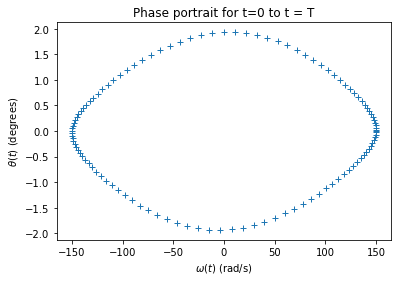

In [5]:
plt.plot(th_plot[0:istep], omegaplt[0:istep], '+')
plt.xlabel(r'$\omega(t)$ (rad/s)')
plt.ylabel(r'$\theta(t)$ (degrees)')
plt.title('Phase portrait for t=0 to t = T')
plt.show()